# Sorting algorithms report for AandDS - report no. 1
by Jędrzej Kopiszka, 145304 2. sem of Artificial Intelligence (2020)

## Algorithms implementation

### 1. Bubble Sort

In [1]:
def bubble_sort(elements):
    n=0
    for i in range(len(elements)-n):
        for j in range(len(elements)-1):
            if elements[j]>elements[j+1]:
                elements[j+1],elements[j] = elements[j], elements[j+1]
                n+=1
    return elements


### 2. Heap sort

In [2]:
def heapify(arr, n, i): 
    largest = i # Initialize largest as root 
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i] < arr[l]: 
        largest = l 
  
    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest] < arr[r]: 
        largest = r 
  
    # Change root, if needed 
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i] # swap 
  
        # Heapify the root. 
        heapify(arr, n, largest) 
  
# The main function to sort an array of given size 
def heapSort(arr): 
    n = len(arr) 
  
    # Build a maxheap. 
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0)

In [3]:
a=[1,4,2,3]
heapSort(a)
a

[1, 2, 3, 4]

### 3. Counting Sort

In [4]:
def countSort(arr): 
  
    # The output character array that will have sorted arr 
    output = [0 for i in range(1602)] 
  
    # Create a count array to store count of inidividul 
    # characters and initialize count array as 0 
    count = [0 for i in range(1602)] 
  
    # For storing the resulting answer since the  
    # string is immutable 
    ans = ["" for _ in arr] 
  
    # Store count of each character 
    for i in arr: 
        count[int(i)] += 1
  
    # Change count[i] so that count[i] now contains actual 
    # position of this character in output array 
    for i in range(1602): 
        count[i] += count[i-1] 
  
    # Build the output character array 
    for i in range(len(arr)): 
        output[count[arr[i]]-1] = arr[i] 
        count[arr[i]] -= 1
  
    # Copy the output array to arr, so that arr now 
    # contains sorted characters 
    for i in range(len(arr)): 
        ans[i] = output[i] 
    return ans 

In [5]:
countSort([52,31,3,12,212,2,2,2,4,0,12,4,654, 343,234, 432,32, 999, 1000])

[0, 2, 2, 2, 3, 4, 4, 12, 12, 31, 32, 52, 212, 234, 343, 432, 654, 999, 1000]

### 4. Shell Sort

In [6]:
def shellSort(arr): 
  
    # Start with a big gap, then reduce the gap 
    n = len(arr) 
    gap = int(n/2)
  
    # Do a gapped insertion sort for this gap size. 
    # The first gap elements a[0..gap-1] are already in gapped  
    # order keep adding one more element until the entire array 
    # is gap sorted 
    while gap > 0: 
        for i in range(gap,n): 
  
            # add a[i] to the elements that have been gap sorted 
            # save a[i] in temp and make a hole at position i 
            temp = arr[i] 
  
            # shift earlier gap-sorted elements up until the correct 
            # location for a[i] is found 
            j = i 
            while  j >= gap and arr[j-gap] >temp: 
                arr[j] = arr[j-gap] 
                j -= gap 
  
            # put temp (the original a[i]) in its correct location 
            arr[j] = temp 
        gap = int(gap/2)
    return arr

In [7]:
shellSort([321,2,1,1600])

[1, 2, 321, 1600]

### 5. Quick Sort

In [8]:
def quick_sort(array):
    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        # Don't forget to return something!
        return quick_sort(less)+equal+quick_sort(greater)  # Just use the + operator to join lists
    # Note that you want equal ^^^^^ not pivot
    else:  # You need to handle the part at the end of the recursion - when you only have one element in your array, just return the array.
        return array

In [9]:
quick_sort([3,2,1,7,5])

[1, 2, 3, 5, 7]

### 6. Merge Sort

In [10]:
# Python program for implementation of MergeSort 
def mergeSort(arr): 
    if len(arr) >1: 
        mid = len(arr)//2 #Finding the mid of the array 
        L = arr[:mid] # Dividing the array elements  
        R = arr[mid:] # into 2 halves 
  
        mergeSort(L) # Sorting the first half 
        mergeSort(R) # Sorting the second half 
  
        i = j = k = 0
          
        # Copy data to temp arrays L[] and R[] 
        while i < len(L) and j < len(R): 
            if L[i] < R[j]: 
                arr[k] = L[i] 
                i+=1
            else: 
                arr[k] = R[j] 
                j+=1
            k+=1
          
        # Checking if any element was left 
        while i < len(L): 
            arr[k] = L[i] 
            i+=1
            k+=1
          
        while j < len(R): 
            arr[k] = R[j] 
            j+=1
            k+=1
    return arr


In [11]:
mergeSort([432,987, 43,232,56,43,21,1,2,121]) 

[1, 2, 21, 43, 43, 56, 121, 232, 432, 987]

## Exercise I.1
compare speed of BS, HS, CS, ShS using randomly generated integers
submit a chart t=f(n)

In [12]:
import time  # library fro time measuring 
import copy # deepcpy for equal data distribution
from numpy import random #generating random numbers according to uniform probability distrib
import numpy as np #numpy for np.nan where computation cannot be done
import pandas as pd # DataFrame for easier data handling
import seaborn as sns  # library for visual aids
import matplotlib.pyplot as plt  # library for visual aids

In [15]:
time_dict={}

for i in range(100, 1600+1, 100):
    #creating datasets
    randoms=[]
    for j in range(i):
        randoms.append(int(random.uniform(1000)))
        
    buble_rand = copy.deepcopy(randoms) 
    heap_rand = copy.deepcopy(randoms)
    count_rand = copy.deepcopy(randoms)
    shell_rand = copy.deepcopy(randoms)
    
    #bubble sort time measuring
    start = time.time()
    bubble_sort(buble_rand)
    end = time.time()
    time_dict[i]=[end-start]
    
    #heap sort time measuring
    start = time.time()
    heapSort(heap_rand)
    end = time.time()
    time_dict[i].append(end-start)
    
    #count sort time measuring
    start = time.time()
    countSort(count_rand)
    end = time.time()
    time_dict[i].append(end-start)
    
    #shell sort 
    start = time.time()
    shellSort(shell_rand)
    end = time.time()
    time_dict[i].append(end-start)
    
time_df = pd.DataFrame.from_dict(orient='index', \
                                 data=time_dict, columns=['Bubble Sort', 'Heap Sort', 'Count Sort', 'Shell Sort'])
time_df

,Bubble Sort,Heap Sort,Count Sort,Shell Sort
100,0.000998,0.000812,0.000183,0.000000
200,0.004680,0.000000,0.000000,0.001031
300,0.014945,0.001984,0.000999,0.001999
400,0.016915,0.002031,0.000000,0.000997
500,0.029923,0.000998,0.000995,0.001001
600,0.040856,0.006980,0.001995,0.003989
700,0.060837,0.002993,0.000000,0.002993
800,0.098845,0.003028,0.000998,0.001994
900,0.095709,0.003025,0.000996,0.001996
1000,0.124779,0.003989,0.000999,0.001998


Text(0, 0.5, 't = f(n)')

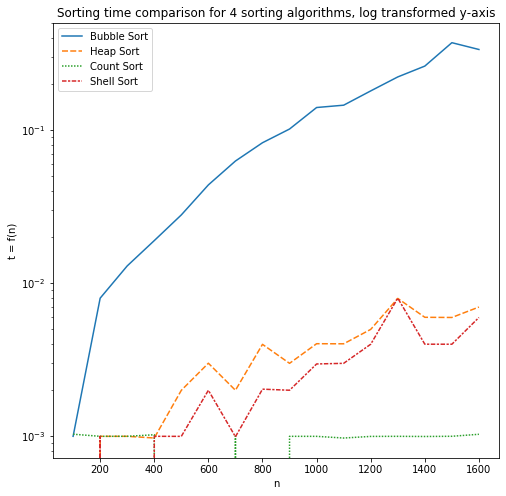

In [14]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_df)
plt.yscale('log')
plt.title('Sorting time comparison for 4 sorting algorithms, log transformed y-axis')
plt.xlabel('n')
plt.ylabel('t = f(n)')

## Exercise I.2
II.1.For different input types compare the effectiveness of 3 sorting algorithms.
a)QS with middle selected pivot, b) HS and c) MS. Examine the performance for the following data types of the sequence:
- random (uniform distribution)
- constant value (e.g.equal to 0)
- increasing order (step equal to 1)
- descending order (step equal to 1)
- ascending-descending order (A shape – increase odd numbers - decrease even)
- descending-ascending order (V -shape – decrease odd numbers - increase even

#### Random distribution of data

In [340]:
time_uniform = {}

for n in range(1000, 16001, 1000):
    uniform_distr=[]
    for j in range(n):
        uniform_distr.append(int(random.uniform(1000)))
        
    quick_uni = copy.deepcopy(uniform_distr)
    heap_uni = copy.deepcopy(uniform_distr)
    merge_ui = copy.deepcopy(uniform_distr)
    
    #quick sort time measurement for random data according to uniform distribution
    start = time.time()
    quick_sort(quick_uni)
    end = time.time()
    time_uniform[n] = [end-start]
    
    #heap sort time measurement 
    start = time.time()
    heapSort(heap_uni)
    end = time.time()
    time_uniform[n].append(end-start)
    
    #merge sort time measurement
    start = time.time()
    mergeSort(merge_ui)
    end = time.time()
    time_uniform[n].append(end-start)
    
time_uniform_df = pd.DataFrame.from_dict(orient='index', \
                                 data=time_uniform, columns=['QuickS unif', 'HeapS unif', 'MergeS unif'])
time_uniform_df.head()

,QuickS unif,HeapS unif,MergeS unif
1000,0.001557,0.003452,0.002998
2000,0.002992,0.007978,0.006981
3000,0.002992,0.013963,0.010971
4000,0.004987,0.018950,0.014960
5000,0.005984,0.024933,0.024936


Text(0.5, 1.0, 'Time comparison on randomly generated data (uniformly distributed)')

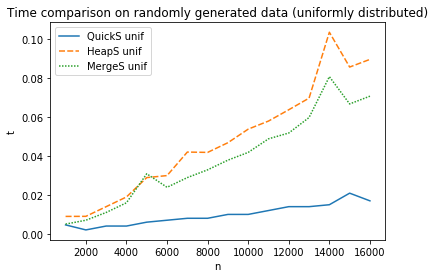

In [301]:
sns.lineplot(data=time_uniform_df)
plt.xlabel('n')
plt.ylabel('t')
plt.title("Time comparison on randomly generated data (uniformly distributed)")

#### Constant value data

In [342]:
time_constant_dic={}

for n in range(1000, 16001, 1000):
    constant_data=[0 for i in range(n)]
    
    start = time.time()
    quick_sort(constant_data)
    end = time.time()
    time_constant_dic[n] = [end-start]
    
    start = time.time()
    heapSort(constant_data)
    end = time.time()
    time_constant_dic[n].append(end-start)
    
    start = time.time()
    mergeSort(constant_data)
    end = time.time()
    time_constant_dic[n].append(end-start)
    
time_constant_df = pd.DataFrame.from_dict(data=time_constant_dic, orient='index', \
                                              columns=['QuickS const', 'HeapS const', 'MergeS const'])
    
time_constant_df.head()

,QuickS const,HeapS const,MergeS const
1000,0.000000,0.000997,0.002967
2000,0.000000,0.002024,0.006158
3000,0.000000,0.001976,0.010972
4000,0.001009,0.002988,0.012932
5000,0.000000,0.004024,0.016955


Text(0.5, 1.0, 'Time comparison for data with only constant value')

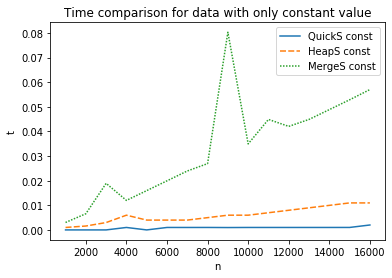

In [303]:
sns.lineplot(data=time_constant_df)
plt.xlabel('n')
plt.ylabel('t')
plt.title('Time comparison for data with only constant value')

Text(0, 0.5, 't')

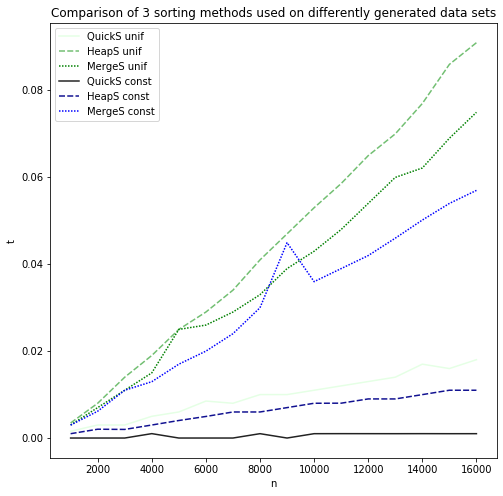

In [344]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_uniform_df, palette=sns.light_palette('green', n_colors=3))
sns.lineplot(data=time_constant_df, style='choice', palette=sns.dark_palette('blue', n_colors=3))
plt.title('Comparison of 3 sorting methods used on differently generated data sets')
plt.xlabel('n')
plt.ylabel('t')

#### Increasing order

In [345]:
time_increasing_dict={}

for n in range(1000, 16001, 1000):
    
    increasing_rand=[j for j in range(n)]
    
    if n < 2500:
        start = time.time()
        quick_sort(increasing_rand)
        end = time.time()
        time_increasing_dict[n] = [end-start]
    else:
        time_increasing_dict[n] = [np.nan]
    
    start = time.time()
    heapSort(increasing_rand)
    end = time.time()
    time_increasing_dict[n].append(end-start)
    
    start = time.time()
    mergeSort(increasing_rand)
    end = time.time()
    time_increasing_dict[n].append(end-start)
    
time_increasing_df = pd.DataFrame.from_dict(data=time_increasing_dict, orient='index', \
                                              columns=['QuickS incr', 'HeapS incr', 'MergeS incr'])
    
time_increasing_df.head()

,QuickS incr,HeapS incr,MergeS incr
1000,0.058851,0.003992,0.002986
2000,0.237390,0.008977,0.004982
3000,NaN,0.014963,0.008978
4000,NaN,0.018949,0.012966
5000,NaN,0.024932,0.015957


Text(0.5, 1.0, 'Time comparison for data generated in increasing order with step 1')

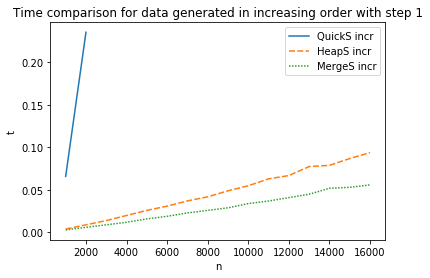

In [329]:
sns.lineplot(data=time_increasing_df)
plt.xlabel('n')
plt.ylabel('t')
plt.title('Time comparison for data generated in increasing order with step 1')

Python interpreter cannot handle that amount of data due to 'maximum recursion depth exceeded' when using Quick Sort

#### Descending order

In [356]:
time_descending_dict={}

for n in range(1000, 16001, 1000):
    
    descending_rand=[j for j in range(n,1,-1)]
    
    quick_desc = copy.deepcopy(descending_rand)
    heap_desc = copy.deepcopy(descending_rand)
    merge_desc = copy.deepcopy(descending_rand)
    if n < 2500:
        start = time.time()
        quick_sort(quick_desc)
        end = time.time()
        time_descending_dict[n] = [end-start]
    else:
        time_descending_dict[n] = [np.nan]
    
    start = time.time()
    heapSort(heap_desc)
    end = time.time()
    time_descending_dict[n].append(end-start)
    
    start = time.time()
    mergeSort(merge_desc)
    end = time.time()
    time_descending_dict[n].append(end-start)
    
time_descending_df = pd.DataFrame.from_dict(data=time_descending_dict, orient='index', \
                                              columns=['QuickS desc', 'HeapS desc', 'MergeS desc'])
    
time_descending_df.head()

,QuickS desc,HeapS desc,MergeS desc
1000,0.041899,0.003985,0.002998
2000,0.167551,0.008979,0.004990
3000,NaN,0.012142,0.009976
4000,NaN,0.019517,0.013537
5000,NaN,0.021942,0.015957


Text(0.5, 1.0, 'Time comparison for data generated in descending order with step -1')

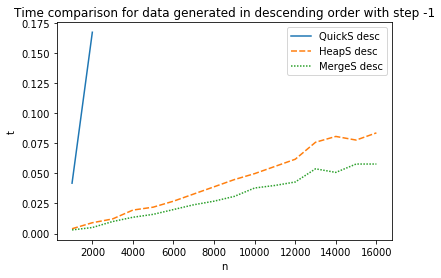

In [357]:
sns.lineplot(data=time_descending_df)
plt.xlabel('n')
plt.ylabel('t')
plt.title('Time comparison for data generated in descending order with step -1')

Python interpreter cannot handle that amount of data due to 'maximum recursion depth exceeded' when using Quick Sort

Text(0, 0.5, 't')

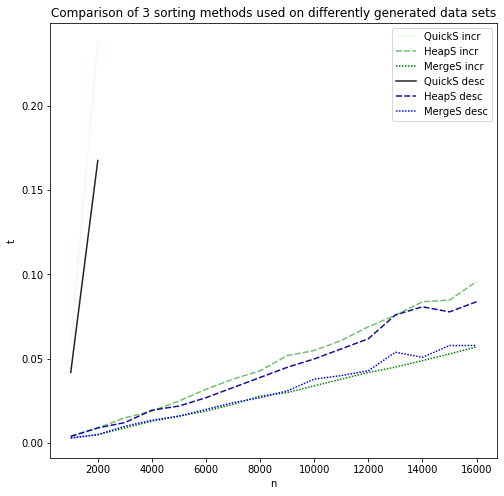

In [358]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_increasing_df, palette=sns.light_palette('green', n_colors=3))
sns.lineplot(data=time_descending_df, palette=sns.dark_palette('blue', n_colors=3))
plt.title('Comparison of 3 sorting methods used on differently generated data sets')
plt.xlabel('n')
plt.ylabel('t')

#### A-shaped data 

In [365]:
a_shape_dict={}
for n in range(1000, 16001, 1000):
    a_shape=[]
    for j in range(n):
        a_shape.append(j)
        a_shape.append(n-j)
    
    quick_a = copy.deepcopy(a_shape)
    heap_a = copy.deepcopy(a_shape)
    merge_a = copy.deepcopy(a_shape)
    
    if n < 2500:
        start = time.time()
        quicksort(quick_a)
        end = time.time()
        a_shape_dict[n] = [end-start]
    else:
        a_shape_dict[n] = [np.nan]
    
    start = time.time()
    heapSort(heap_a)
    end = time.time()
    a_shape_dict[n].append(end-start)
    
    start = time.time()
    mergeSort(merge_a)
    end = time.time()
    a_shape_dict[n].append(end-start)
    
time_a_shape_df = pd.DataFrame.from_dict(data=a_shape_dict, orient='index', \
                        columns=['QuickS. A_shape', 'HeapS. A_shape', 'MergeS. A_shape'])
time_a_shape_df.head()

,QuickS. A_shape,HeapS. A_shape,MergeS. A_shape
1000,0.097738,0.008973,0.006988
2000,0.385847,0.018945,0.014964
3000,NaN,0.029918,0.022941
4000,NaN,0.041887,0.031909
5000,NaN,0.054837,0.040887
6000,NaN,0.065829,0.048864
7000,NaN,0.079960,0.059837
8000,NaN,0.095776,0.066978
9000,NaN,0.105867,0.077787
10000,NaN,0.118641,0.087765


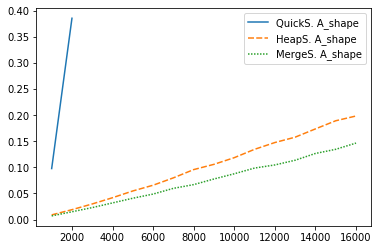

In [366]:
sns.lineplot(data=time_a_shape_df)

#### V-shaped data

In [388]:
v_shape_dict={}
for n in range(1000, 16001, 1000):
    v_shape=[]
    for j in range(n):
        v_shape.append(n-j)
        v_shape.append(j)
    
    quick_v = copy.deepcopy(v_shape)
    heap_v = copy.deepcopy(v_shape)
    merge_v = copy.deepcopy(v_shape)
    
    if n < 2500:
        start = time.time()
        quicksort(quick_v)
        end = time.time()
        v_shape_dict[n] = [end-start]
    else:
        v_shape_dict[n] = [np.nan]
    
    start = time.time()
    heapSort(heap_v)
    end = time.time()
    v_shape_dict[n].append(end-start)
    
    start = time.time()
    mergeSort(merge_v)
    end = time.time()
    v_shape_dict[n].append(end-start)
    
time_v_shape_df = pd.DataFrame.from_dict(data=v_shape_dict, orient='index', \
                        columns=['QuickS. V_shape', 'HeapS. V_shape', 'MergeS. V_shape'])
time_v_shape_df.head()

,QuickS. V_shape,HeapS. V_shape,MergeS. V_shape
1000,0.089336,0.008979,0.005984
2000,0.383302,0.018951,0.013964
3000,NaN,0.029917,0.021946
4000,NaN,0.039895,0.030916
5000,NaN,0.052856,0.038896


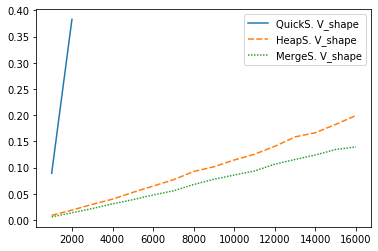

In [389]:
sns.lineplot(data=time_v_shape_df)

Text(0, 0.5, 't')

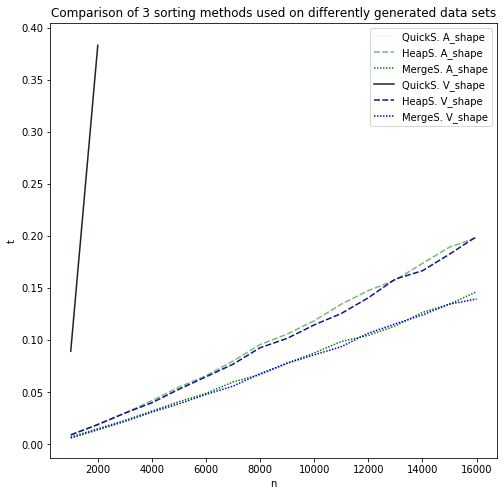

In [390]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_a_shape_df, palette=sns.light_palette('green', n_colors=3))
sns.lineplot(data=time_v_shape_df, palette=sns.dark_palette('blue', n_colors=3))
plt.title('Comparison of 3 sorting methods used on differently generated data sets')
plt.xlabel('n')
plt.ylabel('t')

### Quick Sort for differently generated data sets

#### Uniformly generated

In [16]:
quick_dict={}
for n in range(1000, 2501, 100):
    quick_uni=[]
    for j in range(n):
        quick_uni.append(int(random.uniform(1000)))
        
    start = time.time()
    quick_sort(quick_uni)
    end = time.time()
    quick_dict[n]=[end-start]
quick_dict

{1000: [0.004622459411621094],
 1100: [0.0029621124267578125],
 1200: [0.0019941329956054688],
 1300: [0.0029914379119873047],
 1400: [0.003989219665527344],
 1500: [0.002991914749145508],
 1600: [0.0029921531677246094],
 1700: [0.0029931068420410156],
 1800: [0.0039899349212646484],
 1900: [0.003989219665527344],
 2000: [0.004991769790649414],
 2100: [0.004987001419067383],
 2200: [0.0030214786529541016],
 2300: [0.0019936561584472656],
 2400: [0.002994060516357422],
 2500: [0.002988576889038086]}

#### Constant

In [17]:
for n in range(1000, 2501, 100):
    quick_const=[0 for j in range(n)]
    
    start = time.time()
    quick_sort(quick_const)
    end = time.time()
    quick_dict[n].append(end-start)
quick_dict

{1000: [0.004622459411621094, 0.0],
 1100: [0.0029621124267578125, 0.0],
 1200: [0.0019941329956054688, 0.0010001659393310547],
 1300: [0.0029914379119873047, 0.0],
 1400: [0.003989219665527344, 0.0],
 1500: [0.002991914749145508, 0.0],
 1600: [0.0029921531677246094, 0.0],
 1700: [0.0029931068420410156, 0.0],
 1800: [0.0039899349212646484, 0.0009984970092773438],
 1900: [0.003989219665527344, 0.0],
 2000: [0.004991769790649414, 0.0],
 2100: [0.004987001419067383, 0.0],
 2200: [0.0030214786529541016, 0.0],
 2300: [0.0019936561584472656, 0.0010023117065429688],
 2400: [0.002994060516357422, 0.0009913444519042969],
 2500: [0.002988576889038086, 0.0009970664978027344]}

#### Increasing order

In [18]:
for n in range(1000, 2501, 100):
    quick_incr=[j for j in range(n)]

    start = time.time()
    quick_sort(quick_incr)
    end = time.time()
    quick_dict[n].append(end-start)
quick_dict

{1000: [0.004622459411621094, 0.0, 0.0667877197265625],
 1100: [0.0029621124267578125, 0.0, 0.06899476051330566],
 1200: [0.0019941329956054688, 0.0010001659393310547, 0.08473539352416992],
 1300: [0.0029914379119873047, 0.0, 0.10275626182556152],
 1400: [0.003989219665527344, 0.0, 0.11938738822937012],
 1500: [0.002991914749145508, 0.0, 0.13361358642578125],
 1600: [0.0029921531677246094, 0.0, 0.1545865535736084],
 1700: [0.0029931068420410156, 0.0, 0.16956210136413574],
 1800: [0.0039899349212646484, 0.0009984970092773438, 0.2404191493988037],
 1900: [0.003989219665527344, 0.0, 0.21370601654052734],
 2000: [0.004991769790649414, 0.0, 0.23118805885314941],
 2100: [0.004987001419067383, 0.0, 0.25110554695129395],
 2200: [0.0030214786529541016, 0.0, 0.2774636745452881],
 2300: [0.0019936561584472656, 0.0010023117065429688, 0.3086991310119629],
 2400: [0.002994060516357422, 0.0009913444519042969, 0.3819766044616699],
 2500: [0.002988576889038086, 0.0009970664978027344, 0.3530769348144531

#### Decreasing order

In [19]:
for n in range(1000, 2501, 100):
    quick_incr=[j for j in range(n, 0,-1)]

    start = time.time()
    quick_sort(quick_incr)
    end = time.time()
    quick_dict[n].append(end-start)
quick_dict

{1000: [0.004622459411621094, 0.0, 0.0667877197265625, 0.054955482482910156],
 1100: [0.0029621124267578125, 0.0, 0.06899476051330566, 0.049486398696899414],
 1200: [0.0019941329956054688,
  0.0010001659393310547,
  0.08473539352416992,
  0.07277655601501465],
 1300: [0.0029914379119873047, 0.0, 0.10275626182556152, 0.11134862899780273],
 1400: [0.003989219665527344, 0.0, 0.11938738822937012, 0.0967416763305664],
 1500: [0.002991914749145508, 0.0, 0.13361358642578125, 0.11269831657409668],
 1600: [0.0029921531677246094, 0.0, 0.1545865535736084, 0.11968016624450684],
 1700: [0.0029931068420410156, 0.0, 0.16956210136413574, 0.13689184188842773],
 1800: [0.0039899349212646484,
  0.0009984970092773438,
  0.2404191493988037,
  0.14860272407531738],
 1900: [0.003989219665527344, 0.0, 0.21370601654052734, 0.16759467124938965],
 2000: [0.004991769790649414, 0.0, 0.23118805885314941, 0.15960335731506348],
 2100: [0.004987001419067383, 0.0, 0.25110554695129395, 0.1801776885986328],
 2200: [0.003

#### A-shaped

In [20]:
for n in range(1000, 2501, 100):
    quick_a_sh=[]
    for j in range(n):
        quick_a_sh.append(j)
        quick_a_sh.append(n-j)

    start = time.time()
    quick_sort(quick_incr)
    end = time.time()
    quick_dict[n].append(end-start)
quick_dict

{1000: [0.004622459411621094,
  0.0,
  0.0667877197265625,
  0.054955482482910156,
  0.29219579696655273],
 1100: [0.0029621124267578125,
  0.0,
  0.06899476051330566,
  0.049486398696899414,
  0.2438509464263916],
 1200: [0.0019941329956054688,
  0.0010001659393310547,
  0.08473539352416992,
  0.07277655601501465,
  0.24033737182617188],
 1300: [0.0029914379119873047,
  0.0,
  0.10275626182556152,
  0.11134862899780273,
  0.24752163887023926],
 1400: [0.003989219665527344,
  0.0,
  0.11938738822937012,
  0.0967416763305664,
  0.2580733299255371],
 1500: [0.002991914749145508,
  0.0,
  0.13361358642578125,
  0.11269831657409668,
  0.25452589988708496],
 1600: [0.0029921531677246094,
  0.0,
  0.1545865535736084,
  0.11968016624450684,
  0.25081682205200195],
 1700: [0.0029931068420410156,
  0.0,
  0.16956210136413574,
  0.13689184188842773,
  0.2757437229156494],
 1800: [0.0039899349212646484,
  0.0009984970092773438,
  0.2404191493988037,
  0.14860272407531738,
  0.24720263481140137],


#### V-shaped

In [21]:
for n in range(1000, 2501, 100):
    quick_a_sh=[]
    for j in range(n):
        quick_a_sh.append(n-j)
        quick_a_sh.append(j)

    start = time.time()
    quick_sort(quick_incr)
    end = time.time()
    quick_dict[n].append(end-start)

In [22]:
time_quick_df = pd.DataFrame.from_dict(data=quick_dict, orient='index', \
                        columns=['Uniform', 'Constant', 'Increasing', 'Decreasing', 'A shape', 'V shape'])
time_quick_df

,Uniform,Constant,Increasing,Decreasing,A shape,V shape
1000,0.004622,0.000000,0.066788,0.054955,0.292196,0.264398
1100,0.002962,0.000000,0.068995,0.049486,0.243851,0.251501
1200,0.001994,0.001000,0.084735,0.072777,0.240337,0.244275
1300,0.002991,0.000000,0.102756,0.111349,0.247522,0.244375
1400,0.003989,0.000000,0.119387,0.096742,0.258073,0.292397
1500,0.002992,0.000000,0.133614,0.112698,0.254526,0.250026
1600,0.002992,0.000000,0.154587,0.119680,0.250817,0.243374
1700,0.002993,0.000000,0.169562,0.136892,0.275744,0.246912
1800,0.003990,0.000998,0.240419,0.148603,0.247203,0.240882
1900,0.003989,0.000000,0.213706,0.167595,0.248812,0.244130


Text(0, 0.5, 't')

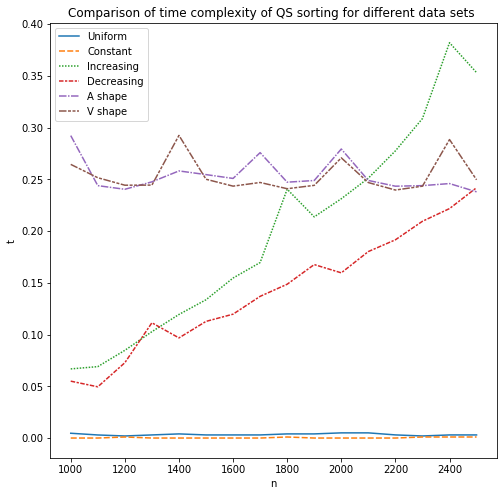

In [24]:
plt.figure(figsize=(8,8))
sns.lineplot(data=time_quick_df)
plt.title('Comparison of time complexity of QS sorting for different data sets ')
plt.xlabel('n')
plt.ylabel('t')